In [0]:
import pandas as pd
import numpy as np
import os
from nltk.corpus import stopwords
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
import re
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('/content/train.csv')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [0]:
data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


# **Preprocessing**

In [0]:
data.dropna(axis=0)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
6,@wawinereport,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",Tradition,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Gordon Estate,Red Blend
7,@vboone,US,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",Monte Rosso Reserve,90,50.0,California,Sonoma County,Sonoma,Rock Wall,Zinfandel
8,@paulgwine,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
10,@vboone,US,Cuvaison 2014 Estate Grown Sauvignon Blanc (Ca...,With an alluring bouquet of fresh-cut jasmine ...,Estate Grown,90,18.0,California,Carneros,Napa-Sonoma,Cuvaison,Sauvignon Blanc
34,@paulgwine,US,Durant 2013 Raven Chardonnay (Dundee Hills),"Peach pit, apple and pear fruit flavors combin...",Raven,92,25.0,Oregon,Dundee Hills,Willamette Valley,Durant,Chardonnay
...,...,...,...,...,...,...,...,...,...,...,...,...
82630,@vboone,US,Yorkville Cellars 2010 Randle Hill Vineyard Sa...,"A glass of pretty aromatics, grapefruit and or...",Randle Hill Vineyard,88,18.0,California,Yorkville Highlands,North Coast,Yorkville Cellars,Sauvignon Blanc
82632,@vboone,US,un4seen 2009 Red blend Red (California),"Dark like a cave in color, this big red blend ...",Red blend,85,10.0,California,California,California Other,un4seen,Red Blend
82639,@paulgwine,US,Archery Summit 2012 Red Hills Estate Pinot Noi...,"Showing a light whiff of funk, this seems a bi...",Red Hills Estate,92,85.0,Oregon,Dundee Hills,Willamette Valley,Archery Summit,Pinot Noir
82641,@gordone_cellars,US,The Withers Winery 2013 Mr. Burgess Red (El Do...,"Imposing, concentrated and tannic, this Syrah-...",Mr. Burgess,92,36.0,California,El Dorado,Sierra Foothills,The Withers Winery,Rhône-style Red Blend


In [0]:
input_data = data['review_description']
output_data = data['variety']

In [0]:
print ('There are %d varieties of wines in this dataset' % len(set(output_data)))


There are 28 varieties of wines in this dataset


For Encoding our target feature that is "variety", we use labelEncoder.It will go from 0 to 27 as total no. of varities is 28.Also it will assign same value if there is any repetition.

In [0]:
labelEncoder = LabelEncoder()
output_data = labelEncoder.fit_transform(output_data)
output_data

array([ 5, 17, 11, ...,  6,  0,  3])

Cleaning Description data

In [0]:
input_data = input_data.str.lower() #Converting all letters to lower case

In [0]:
List = []
for phase_word in input_data:
    List.append(' '.join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
input_data = List

I am using tfidf vectorizer for coverting our text data to numeric form for our model

In [0]:
vectorizer = TfidfVectorizer()
input_data = vectorizer.fit_transform(input_data)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

In [0]:
model = Sequential()
model.add(Dense(200, activation='relu', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(units=output_data.max()+1, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, verbose=1)

Epoch 1/4
66125/66125 [==============================] - 183s 3ms/step - loss: 1.4127 - accuracy: 0.5857
Epoch 2/4
66125/66125 [==============================] - 183s 3ms/step - loss: 0.6830 - accuracy: 0.7930
Epoch 3/4
66125/66125 [==============================] - 183s 3ms/step - loss: 0.4619 - accuracy: 0.8616
Epoch 4/4
66125/66125 [==============================] - 182s 3ms/step - loss: 0.3339 - accuracy: 0.9009


In [0]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print (accuracy[1])

16532/16532 [==============================] - 7s 407us/step
0.7011855840682983


# Data Visualization

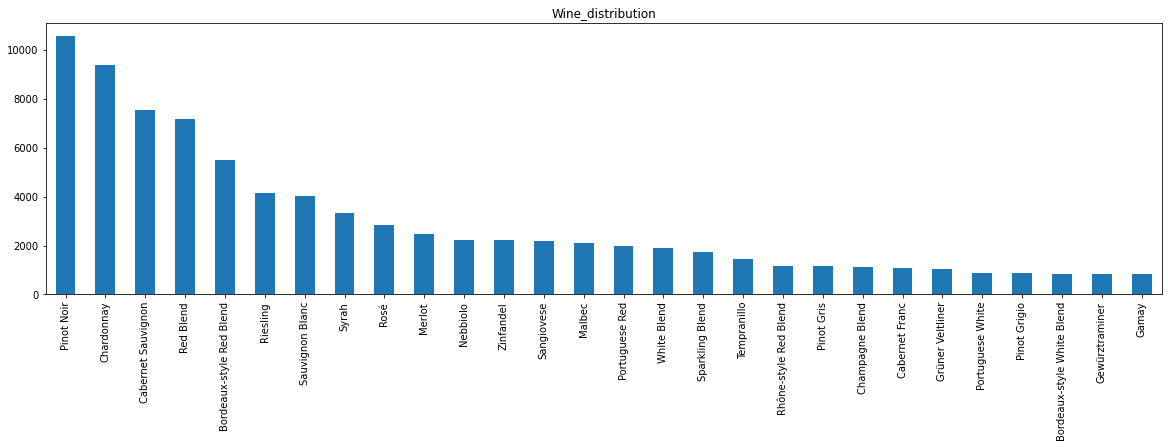

In [0]:
plt.figure(figsize = (20, 5))
plt.title("Wine_distribution")
data.variety.value_counts().plot.bar();